In [4]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [5]:
# Cargamos los datos (usamos una muestra para este notebook)
# En caso de que no funcione la carga directa, ajustar la ruta al archivo
import polars as pl

try:
    columnas_fecha = ["FECHA_NACIMIENTO", "FECHA_INGRESO", "FECHAALTA"]
    df = pl.scan_csv("data/GRD_2023_muestra_cancer_UCV.csv", null_values=["DESCONOCIDO"])
    df = df.with_columns([
        pl.coalesce([
            pl.col(col).str.strptime(pl.Date, "%d-%m-%Y", strict=False),
            pl.col(col).str.strptime(pl.Date, "%Y-%m-%d", strict=False)
        ]).alias(col)  # 
        for col in columnas_fecha
    ])
    # Finalmente, materializamos el DataFrame en memoria (si usas lazy):
    df = df.collect()
    grd_data = df.to_pandas()
    print("CSV CARGADO")

except:
    # Este es un dataset simulado para el notebook en caso de no tener acceso al archivo real
    # Solo para fines didácticos
    n_samples = 1000
    grd_data = pd.DataFrame({
        'COD_HOSPITAL': np.random.randint(100000, 200000, n_samples),
        'CIP_ENCRIPTADO': np.random.randint(1000000, 9000000, n_samples),
        'SEXO': np.random.choice(['M', 'F'], n_samples),
        'FECHA_NACIMIENTO': [pd.Timestamp('1940-01-01') + 
                            pd.Timedelta(days=np.random.randint(0, 365*70)) for _ in range(n_samples)],
        'SERVICIO_SALUD': np.random.choice(['METROPOLITANO CENTRAL', 'METROPOLITANO NORTE', 
                                          'METROPOLITANO SUR', 'METROPOLITANO ORIENTE'], n_samples),
        'TIPO_INGRESO': np.random.choice(['URGENCIA', 'ELECTIVO'], n_samples),
        'FECHA_INGRESO': [pd.Timestamp('2023-01-01') + 
                          pd.Timedelta(days=np.random.randint(0, 364)) for _ in range(n_samples)],
        'FECHAALTA': [pd.Timestamp('2023-01-01') + 
                     pd.Timedelta(days=np.random.randint(1, 365)) for _ in range(n_samples)],
        'TIPOALTA': np.random.choice(['DOMICILIO', 'TRASLADO', 'FALLECIMIENTO'], 
                                   n_samples, p=[0.8, 0.15, 0.05]),
        'DIAGNOSTICO1': np.random.choice(['C61', 'C67', 'C64', 'C50', 'I10'], 
                                       n_samples, p=[0.3, 0.2, 0.2, 0.2, 0.1]),
        'IR_29301_COD_GRD': np.random.choice([101101, 101102, 101103, 114101, 114102], n_samples),
        'IR_29301_PESO': np.random.uniform(0.5, 3.0, n_samples).astype(str),
        'IR_29301_SEVERIDAD': np.random.choice([0, 1, 2, 3], n_samples),
        'IR_29301_MORTALIDAD': np.random.choice([0, 1, 2, 3], n_samples),
    })
    print("CSV NOT FOUND")

# Mostramos información básica del dataframe
print("Información del dataset GRD:")
print(f"Tamaño: {grd_data.shape[0]} filas, {grd_data.shape[1]} columnas")
print("\nColumnas disponibles:")
for col in grd_data.columns:
    print(f"- {col}")
    
print("\nPrimeras 5 filas:")
grd_data.head()

CSV CARGADO
Información del dataset GRD:
Tamaño: 1039587 filas, 14 columnas

Columnas disponibles:
- COD_HOSPITAL
- CIP_ENCRIPTADO
- SEXO
- FECHA_NACIMIENTO
- SERVICIO_SALUD
- TIPO_INGRESO
- FECHA_INGRESO
- FECHAALTA
- TIPOALTA
- DIAGNOSTICO1
- IR_29301_COD_GRD
- IR_29301_PESO
- IR_29301_SEVERIDAD
- IR_29301_MORTALIDAD

Primeras 5 filas:


,COD_HOSPITAL,CIP_ENCRIPTADO,SEXO,FECHA_NACIMIENTO,SERVICIO_SALUD,TIPO_INGRESO,FECHA_INGRESO,FECHAALTA,TIPOALTA,DIAGNOSTICO1,IR_29301_COD_GRD,IR_29301_PESO,IR_29301_SEVERIDAD,IR_29301_MORTALIDAD
0,122100,72196813.0,HOMBRE,1980-04-13,VALDIVIA,URGENCIA,2023-03-12,2023-03-14,DOMICILIO,K35.3,64161.0,"0,7094",1.0,1.0
1,114101,NaN,HOMBRE,2001-11-04,METROPOLITANO SURORIENTE,URGENCIA,2023-11-04,2023-11-10,DOMICILIO,J93.1,41301.0,"1,0869",1.0,1.0
2,114101,97627974.0,HOMBRE,2020-07-30,METROPOLITANO SURORIENTE,URGENCIA,2023-06-07,2023-06-08,HOSPITALIZACIÓN DOMICILIARIA,J12.1,44161.0,"0,4084",1.0,1.0
3,106103,67770674.0,MUJER,1978-11-14,VALPARAISO SAN ANTONIO,PROGRAMADA,2023-05-25,2023-05-26,DOMICILIO,N39.3,131301.0,"0,6406",1.0,1.0
4,106103,100390800.0,MUJER,2023-12-20,VALPARAISO SAN ANTONIO,URGENCIA,2023-12-28,2023-12-30,DOMICILIO,R17,74131.0,"0,5346",1.0,1.0


In [6]:
grd_data[["IR_29301_MORTALIDAD", "SEXO", "FECHA_NACIMIENTO", "FECHA_INGRESO", "FECHAALTA"]].head()
grd_data["SERVICIO_SALUD"].value_counts()

SERVICIO_SALUD
METROPOLITANO SURORIENTE    93199
METROPOLITANO OCCIDENTE     70997
DEL MAULE                   70645
METROPOLITANO SUR           55839
METROPOLITANO CENTRAL       54484
COQUIMBO                    52101
VIÑA DEL MAR QUILLOTA       50370
ARAUCANÍA SUR               46871
LIBERTADOR B. O HIGGINS     44749
CONCEPCIÓN                  42028
METROPOLITANO ORIENTE       40669
METROPOLITANO NORTE         36735
ÑUBLE                       34588
VALPARAISO SAN ANTONIO      33528
ANTOFAGASTA                 33026
BIOBIO                      31634
DEL RELONCAVÍ               29449
TALCAHUANO                  27850
VALDIVIA                    24843
ACONCAGUA                   21727
IQUIQUE                     21127
ARAUCANÍA NORTE             20671
ATACAMA                     20335
ARICA                       19887
OSORNO                      19481
MAGALLANES                  13383
AYSEN                       10044
ARAUCO                       9965
CHILOÉ                       8621

## Simulacion

In [24]:

print("SIMULACIÓN DE DATOS PARA ANÁLISIS DE MORTALIDAD POR SERVICIO")

#Primero hacemos una simulacion levantando los siuientes datos:
#-Mortalidad x
#-Dias estancia x
#-Enfermedad x
#-Servicio_Salud 
#-Paciente

# 1. Simulamos datos
#np.random.seed(123)
n = 200  # número de pacientes

# Severidad como variable categórica (0, 1, 2, 3)
mortalidad = np.random.choice([0, 1, 2, 3], size=n, p=[0.2, 0.3, 0.3, 0.2])

# Días de estancia que aumentan con la severidad (simulando una relación)
# Usamos diferentes parámetros de distribución gamma para cada nivel de severidad
dias_estancia = np.zeros(n)
for i in range(n):
    if mortalidad[i] == 0:
        dias_estancia[i] = np.random.gamma(shape=1.5, scale=2, size=1)
    elif mortalidad[i] == 1:
        dias_estancia[i] = np.random.gamma(shape=2, scale=2.5, size=1)
    elif mortalidad[i] == 2:
        dias_estancia[i] = np.random.gamma(shape=3, scale=3, size=1)
    else:  # severidad 3
        dias_estancia[i] = np.random.gamma(shape=4, scale=4, size=1)
#Enfermedad
enfermedad= np.empty(n, dtype=object)
for i in range(n):
    if mortalidad[i] == 0:
        enfermedad[i] = np.random.choice(["Ligma","Deez","Larsifis","Putitis"],p=[0.4,0.3,0.2,0.1])
    elif mortalidad[i] == 1:
        enfermedad[i] = np.random.choice(["Hypotiroidismo","Hypertiroidismo","Gripe","Sinusitis"],p=[0.4,0.3,0.2,0.1])
    elif mortalidad[i] == 2:
        enfermedad[i] = np.random.choice(["Diarrea","Diabetes","Colealitis","Pneumonia"],p=[0.4,0.3,0.2,0.1])
    else:  # severidad 3
        enfermedad[i] = np.random.choice(["Paro Cardiaco","Derrame Cerebral","Tuberculosis","Cirrosis hepática"],p=[0.4,0.3,0.2,0.1])

#Servicios salud
sevs=["METROPOLITANA","VALDIVIA","VIÑA DEL MAR","PUERTO MONTT","PUERTO VARAS"]
servicio_salud= np.empty(n, dtype=object)
for i in range(n):
    if np.random.randint(0,1)==0:
        servicio_salud[i]= np.random.choice(sevs,p=[0.4,0.2,0.2,0.1,0.1])
    else:
         servicio_salud[i]= np.random.choice(sevs,p=[0.4,0.2,0.2,0.1,0.1])

paciente= np.empty(n, dtype=object)
for i in range(n):
    paciente[i] = np.random.randint(1000000, 3000000)   

# Creamos un DataFrame
sim_data = pd.DataFrame({
    'Mortalidad': mortalidad,
    'Dias_estancia': dias_estancia,
    'Enfermedad': enfermedad,
    'Servicio_Salud': servicio_salud,
    'ID_Pacienete': paciente,

    'Mortalidad_cat': pd.Categorical(mortalidad, categories=[0, 1, 2, 3], 
                                    ordered=True).map({0: 'Sin gravedad', 1: 'Menor', 
                                                     2: 'Moderada', 3: 'Mayor'})
})

sim_data

SIMULACIÓN DE DATOS PARA ANÁLISIS DE MORTALIDAD POR SERVICIO


C:\Users\lenovo\AppData\Local\Temp\ipykernel_5488\55678000.py:28: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  dias_estancia[i] = np.random.gamma(shape=4, scale=4, size=1)
C:\Users\lenovo\AppData\Local\Temp\ipykernel_5488\55678000.py:26: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  dias_estancia[i] = np.random.gamma(shape=3, scale=3, size=1)
C:\Users\lenovo\AppData\Local\Temp\ipykernel_5488\55678000.py:22: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  dias_estanc

,Mortalidad,Dias_estancia,Enfermedad,Servicio_Salud,ID_Pacienete,Mortalidad_cat
0,3,15.688953,Tuberculosis,VALDIVIA,2159514,Mayor
1,2,7.089171,Diabetes,VALDIVIA,2982571,Moderada
2,2,4.363575,Diabetes,VIÑA DEL MAR,1890208,Moderada
3,0,0.180629,Larsifis,METROPOLITANA,1060017,Sin gravedad
4,1,5.307603,Hypotiroidismo,VIÑA DEL MAR,1137334,Menor
...,...,...,...,...,...,...
195,0,3.221063,Ligma,METROPOLITANA,1317206,Sin gravedad
196,3,34.008798,Derrame Cerebral,VIÑA DEL MAR,2058636,Mayor
197,2,6.261729,Diabetes,VALDIVIA,1599803,Moderada
198,2,16.612361,Diarrea,PUERTO VARAS,2106741,Moderada


In [25]:
sim_data["Servicio_Salud"].value_counts()

Servicio_Salud
METROPOLITANA    87
VALDIVIA         43
VIÑA DEL MAR     41
PUERTO MONTT     16
PUERTO VARAS     13
Name: count, dtype: int64

C:\Users\lenovo\AppData\Local\Temp\ipykernel_5488\274439425.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Mortalidad_cat', y='Dias_estancia', data=sim_data, palette='YlOrRd')


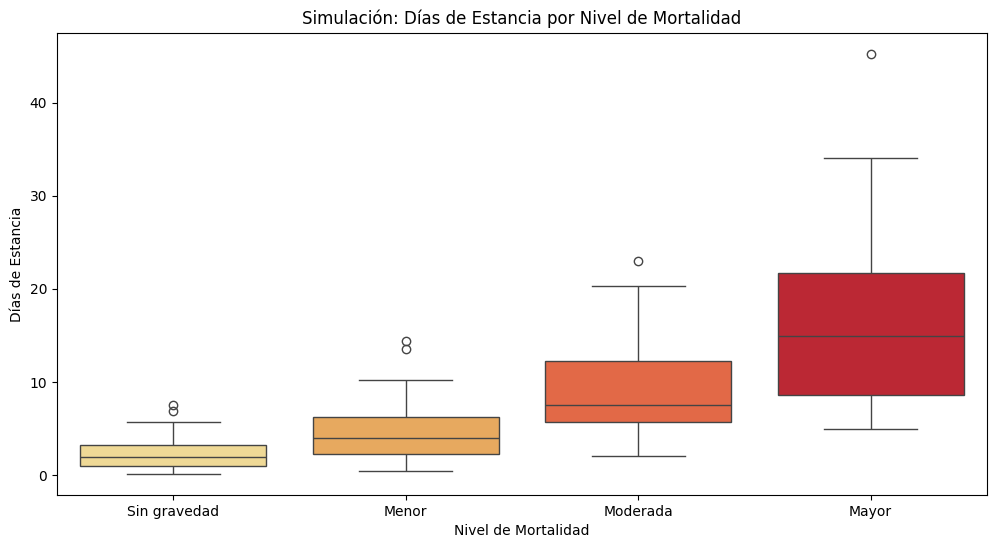

Resultados del ANOVA:
Estadístico F: 62.1684
p-valor: 0.0000
Conclusión: Hay diferencias significativas entre los grupos

Estadísticas descriptivas por nivel de severidad:


C:\Users\lenovo\AppData\Local\Temp\ipykernel_5488\274439425.py:28: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  display(sim_data.groupby('Mortalidad_cat')['Dias_estancia'].describe())


,count,mean,std,min,25%,50%,75%,max
Mortalidad_cat,,,,,,,,
Sin gravedad,38.0,2.351508,1.811746,0.144310,0.974212,1.925485,3.252177,7.545306
Menor,63.0,4.511118,2.968694,0.418436,2.297271,3.978603,6.229641,14.367697
Moderada,53.0,8.802364,4.806433,2.018595,5.726666,7.529906,12.212261,23.016972
Mayor,46.0,16.468423,9.084161,4.971659,8.562895,14.900439,21.731602,45.247510


In [31]:
# 2. Visualizamos la relación
plt.figure(figsize=(12, 6))
sns.boxplot(x='Mortalidad_cat', y='Dias_estancia', data=sim_data, palette='YlOrRd')
plt.title('Simulación: Días de Estancia por Nivel de Mortalidad')
plt.xlabel('Nivel de Mortalidad')
plt.ylabel('Días de Estancia')
plt.show()

# 3. Análisis estadístico: ANOVA para comparar medias entre grupos
from scipy.stats import f_oneway

# Separamos los grupos
grupo0 = sim_data[sim_data['Mortalidad'] == 0]['Dias_estancia']
grupo1 = sim_data[sim_data['Mortalidad'] == 1]['Dias_estancia']
grupo2 = sim_data[sim_data['Mortalidad'] == 2]['Dias_estancia']
grupo3 = sim_data[sim_data['Mortalidad'] == 3]['Dias_estancia']

# Realizamos ANOVA
f_stat, p_valor = f_oneway(grupo0, grupo1, grupo2, grupo3)

print(f"Resultados del ANOVA:")
print(f"Estadístico F: {f_stat:.4f}")
print(f"p-valor: {p_valor:.4f}")
print(f"Conclusión: {'Hay diferencias significativas entre los grupos' if p_valor < 0.05 else 'No hay diferencias significativas entre los grupos'}")

# 4. Resumen descriptivo por grupo
print("\nEstadísticas descriptivas por nivel de severidad:")
display(sim_data.groupby('Mortalidad_cat')['Dias_estancia'].describe())

# Su turno: Modifique este ejemplo o cree una nueva simulación
# relacionada con su pregunta de investigación